In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [138]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [139]:
data.shape

(571, 43)

In [97]:
data.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [9]:
# ENCODING THE CATEGORICAL STRING INTO INTEGERS

In [140]:
data = data.dropna(axis = 0)
data.shape

(417, 43)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [141]:
x = data.drop(columns = ['CGPA'])
y = data.CGPA

In [142]:
x = x.apply(LabelEncoder().fit_transform)
x

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,5,10,8,6,8,10,9,8,5,...,6,8,8,8,8,2,0,8,3,2
1,1,0,9,10,9,5,6,9,0,10,...,9,10,9,6,9,2,5,6,6,3
2,2,0,3,0,5,4,0,5,4,2,...,2,3,3,0,6,0,0,0,2,0
3,3,9,7,10,9,9,2,10,8,9,...,8,10,6,10,8,5,3,7,7,7
4,4,2,2,2,4,0,0,2,4,0,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,412,3,0,0,2,1,0,2,2,1,...,4,2,2,0,0,0,4,4,3,0
567,413,1,0,0,0,0,0,0,2,0,...,2,4,4,0,0,2,3,2,6,2
568,414,3,0,2,4,0,0,0,0,0,...,4,2,3,0,4,0,6,4,2,2
569,415,0,4,9,0,9,10,5,8,5,...,4,9,3,3,8,9,6,3,5,6


In [101]:
columns = x.columns
columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412'],
      dtype='object')

In [143]:
x.isna().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
dtype: int64

In [28]:
# EDA

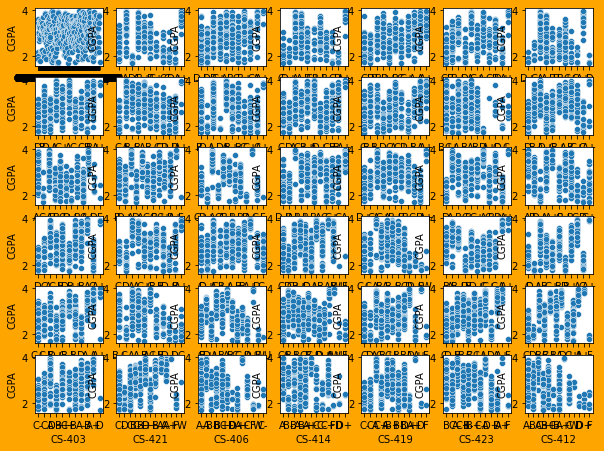

In [104]:
import seaborn as sns
plt.figure(figsize=(10,10),facecolor='orange',)
plotnumber = 1


for column in data:
    if plotnumber<=42:
        ax=plt.subplot(8,7,plotnumber)
        sns.scatterplot(data[column],data['CGPA'])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [144]:
x.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,208.000000,2.858513,5.011990,2.376499,3.932854,4.040767,2.124700,4.318945,4.016787,3.414868,...,4.067146,5.007194,4.788969,3.496403,5.702638,2.952038,2.654676,3.750600,4.752998,3.119904
std,120.521782,2.545099,2.732875,2.595248,3.209856,2.904037,2.263589,2.951768,2.845747,2.354021,...,2.777883,3.163409,2.786225,2.955700,2.696654,2.580921,2.409054,2.399951,2.725220,2.495190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,0.000000,4.000000,2.000000,0.000000,2.000000,2.000000,2.000000
50%,208.000000,2.000000,5.000000,2.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,...,4.000000,5.000000,5.000000,3.000000,6.000000,2.000000,2.000000,4.000000,4.000000,2.000000
75%,312.000000,4.000000,7.000000,4.000000,6.000000,6.000000,3.000000,7.000000,6.000000,5.000000,...,6.000000,8.000000,7.000000,5.000000,8.000000,4.000000,4.000000,5.000000,7.000000,4.000000
max,416.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,11.000000,11.000000,11.000000,10.000000,12.000000,12.000000,11.000000,11.000000,11.000000,12.000000


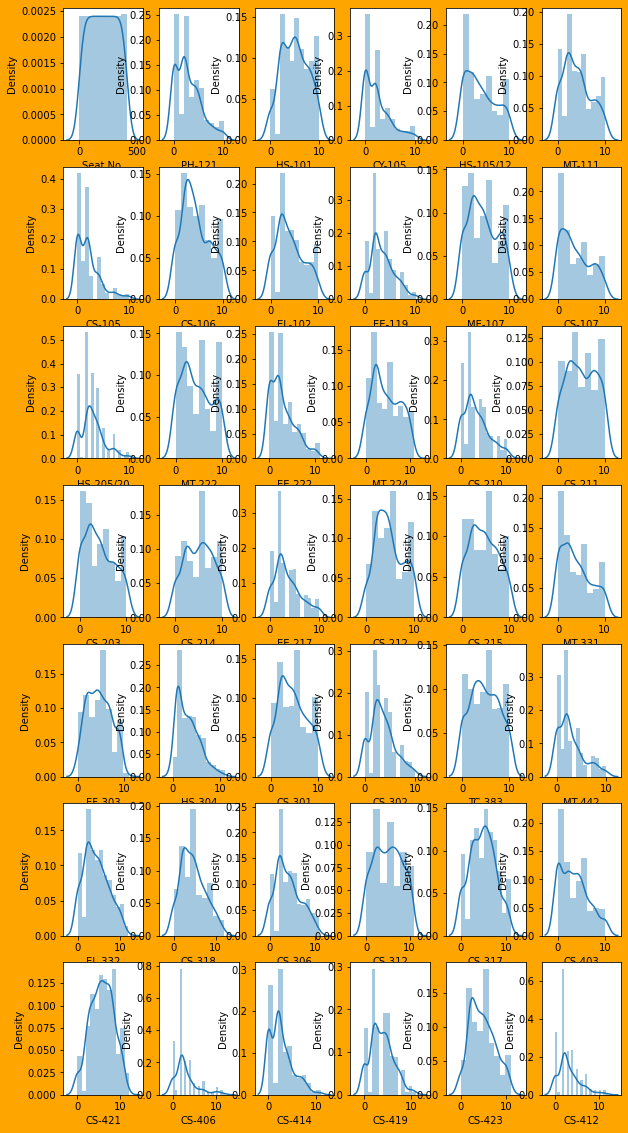

In [109]:
plt.figure(figsize=(10,20),facecolor='orange',)
plotnumber = 1


for column in x:
    if plotnumber<=42:
        ax=plt.subplot(7,6,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [ ]:
#EDA Observations:
1. no skewness found. No need of treating the Outliers.

In [151]:
x.shape

(417, 42)

In [146]:
x = x.drop(columns = ['Seat No.'])

In [149]:
h = x
h['CGPA'] = y

In [150]:
h.shape

(417, 42)

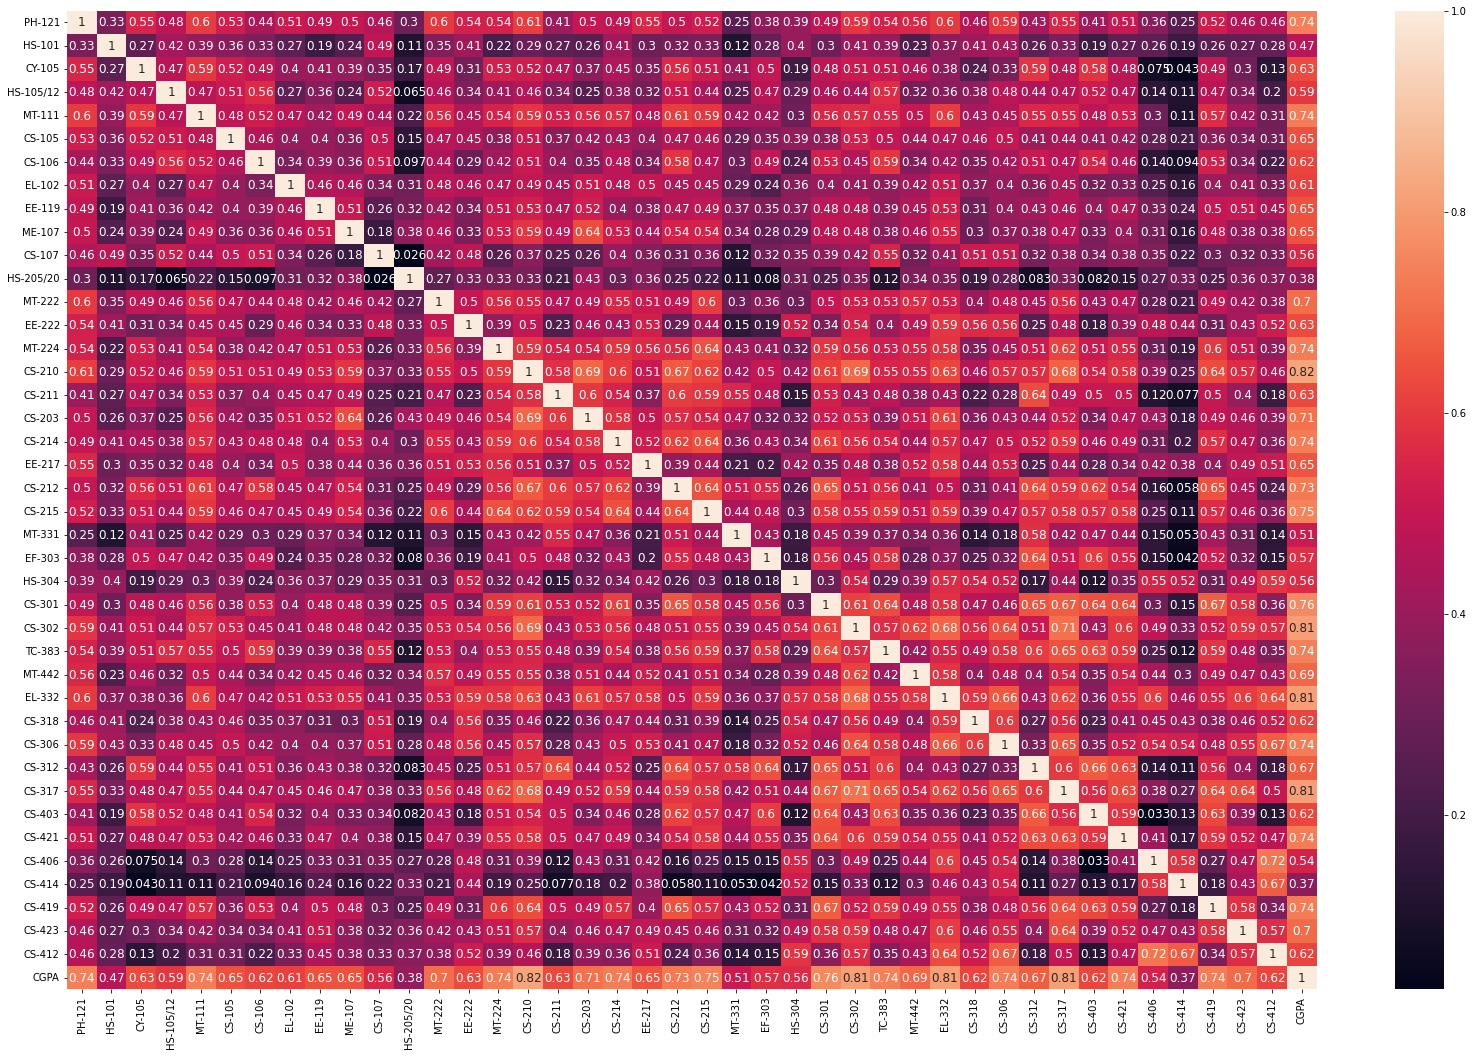

In [132]:
df_corr = h.corr().abs()  

plt.figure(figsize =(28, 18))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :12})
plt.show()

In [41]:
# all features have good relation ship with target.

In [152]:
x = x.drop(columns = ['CGPA'])

In [153]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [155]:
x_scaled.shape

(417, 41)

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,2.749703,PH-121
1,1.756404,HS-101
2,2.600269,CY-105
3,2.376069,HS-105/12
4,2.730166,MT-111
5,2.162537,CS-105
6,2.262486,CS-106
7,1.931141,EL-102
8,2.107535,EE-119
9,2.291657,ME-107


In [157]:
# no multicollinearity as there is no vif value greater than 5.

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.8,random_state = 355)

In [159]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [167]:
predicted_price_train = lm.predict(x_train)

In [171]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,roc_curve, roc_auc_score,classification_report
r2_score(y_train,predicted_price_train)

0.9923641139032912

In [169]:
predicted_price_test = lm.predict(x_test)
r2_score(y_test,predicted_price_test)

0.992397334897501

In [174]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [176]:
rate = LassoCV(alphas= None, max_iter= 150, normalize=True)
rate.fit (x_train, y_train)

LassoCV(max_iter=150, normalize=True)

In [188]:
alpha = rate.alpha_
alpha

2.5735323618517943e-05

In [189]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=2.5735323618517943e-05)

In [190]:
lasso_reg.score(x_train, y_train)

0.9923641047922123

In [191]:
lasso_reg.score(x_test, y_test)

0.9924005544475015